# Fokker-planck exploration

The stationary solution for a "homogeneous fokker-planck" roughly takes the form of
$$
{\mathrel {\rm d} \over \mathrel {\rm d} t} A(x) p_s(x) - {1\over2} {\mathrel {\rm d}^2 \over \mathrel {\rm d} t^2} B(x) p_s(x) = 0
$$

In [18]:
using Plots; gr()
using Distributions, StatsPlots
using LaTeXStrings

Modeling $ X + A \mathrel\rightleftharpoons 2 X $
where the species $A$ is presumed to be constant in concentration

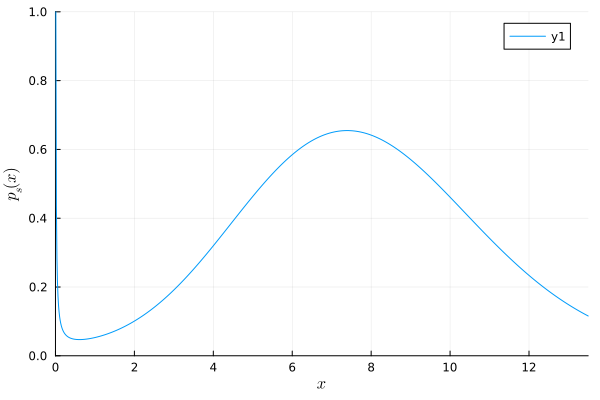

In [115]:
a = 9;

function pₛ(x)
    # a = @. 1 - x
    # a = 10
   return @. exp(-2*x)*(a+x)^(4*a -1)*x^-1
end

X = range(1e-2, 1.5*a,length=1000)
# X = range(0, 2*a,length=1000)
pₘₐₓ = maximum(pₛ(X))
Px = pₛ(X) / pₘₐₓ

plot(X, Px)
# plot(X, pₛ(X))

xlims!(0,Inf)
ylims!(0,Inf)

xlabel!(L"x")
ylabel!(L"p_{\!s}\!(x)")

In [61]:

arr = pₛ(X)
maximum(arr)

100.98996733066232

Modeling $ X \ ^{k_1}\!\!\rightleftharpoons_{k_2} A $
where the species $A$ is presumed to be constant in concentration

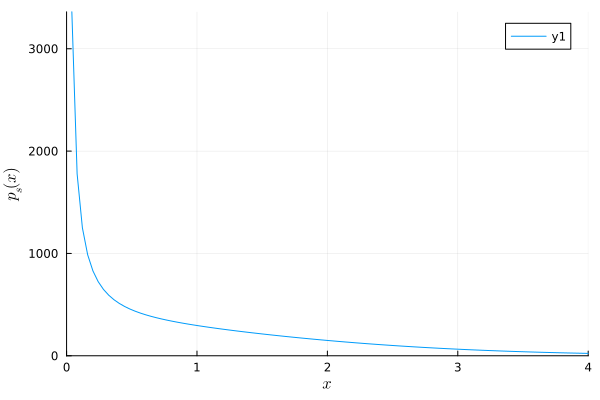

In [ ]:
a = 2;
function pₛ(x)
    a = 1-x
   return @. exp(-2*x)*(a+x)^(4*a -1)*x^-1
end

X = range(0,2*a,length=100)
plot(X, pₛ(X))

xlims!(0,Inf)
ylims!(0,Inf)

xlabel!(L"x")
ylabel!(L"p_{\!s}\!(x)")

The gaussian approximation of the the afformentioned system

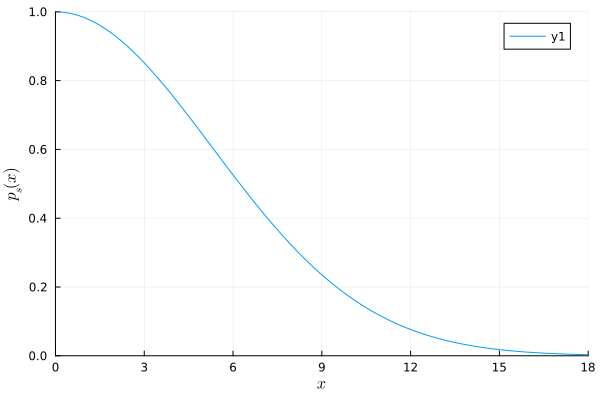

In [123]:
a₀ = 14;
k = [1;2]
k₁, k₂ = k



function Pₛ(x)
   return @. exp(-((k₁*x^2)/(2*k₂*a₀)))
end

X = range(0,2*a,length=100)
plot(X, Pₛ(X))

xlims!(0,Inf)
ylims!(0,Inf)

xlabel!(L"x")
ylabel!(L"p_{\!s}\!(x)")

In [125]:
prod([2,4,5])

40

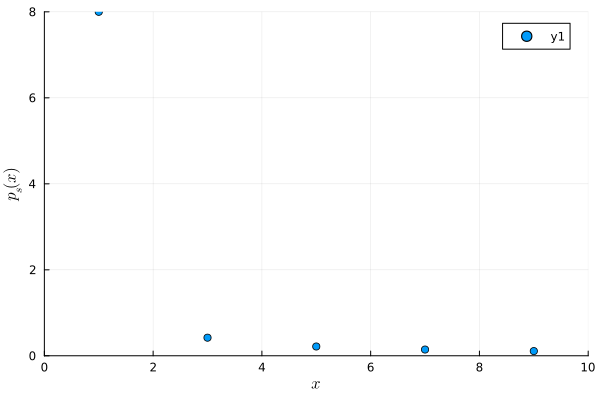

In [170]:
a₀ = 10;
k = [1;8]
k₁, k₂ = k

A(x) = -k₁ * x + k₂ * (1 - x)
B(x) = k₁ * x - k₂ * (1 - x)


t⁻(x) = -k₁*x + k₂*(1-x)
t⁺(x) = k₁*x - k₂*(1-x)
# t⁻(x) = t⁺(x-1)


P₀ = 1

function Pₛ(x) 
   return P₀ * prod([t⁺(z-1)/t⁻(z) for z ∈ 1:x])
end

X = [1:1:10...]
scatter(X, Pₛ.(X))

xlims!(0,Inf)
ylims!(0,Inf)

xlabel!(L"x")
ylabel!(L"p_{\!s}\!(x)")